# Libraries 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [25]:
df= pd.read_csv('Titanic-Dataset.csv')

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.shape

(891, 12)

## Check for NULL Data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
df['Cabin'].isna().sum()

687

In [30]:
df['Age'].isna().sum()

177

In [23]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

## Droping Un-Realted Coloums

In [33]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [35]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

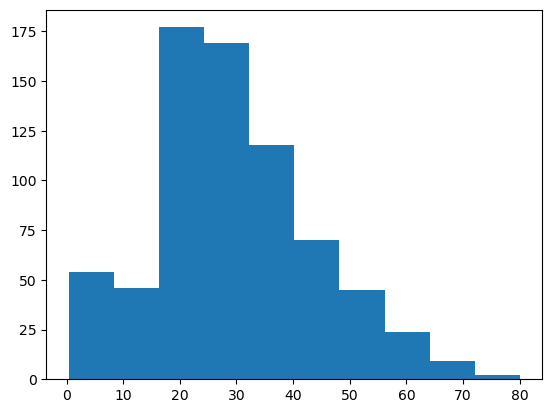

In [37]:
plt.hist(df['Age'])

## Filling the Null values using the median

In [41]:
df.loc[df['Age']==np.nan,'Age']=df['Age'].median()

In [46]:
df['Age']=df['Age'].astype(float)

In [48]:
df['Age']=df['Age'].apply(np.ceil)

<Axes: >

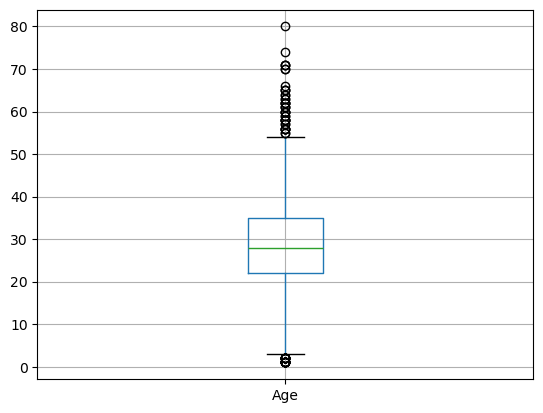

In [50]:
df[['Age']].boxplot()

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 1. ,  8.9, 16.8, 24.7, 32.6, 40.5, 48.4, 56.3, 64.2, 72.1, 80. ]),
 <BarContainer object of 10 artists>)

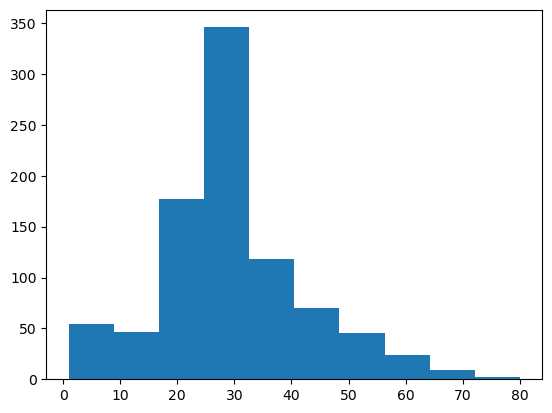

In [52]:
plt.hist(df['Age'])

In [54]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## One-Hot encoding

In [57]:
df=pd.get_dummies(df,columns=['Sex','Embarked'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    bool   
 7   Sex_male    891 non-null    bool   
 8   Embarked_C  891 non-null    bool   
 9   Embarked_Q  891 non-null    bool   
 10  Embarked_S  891 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 46.2 KB


In [61]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


<Axes: >

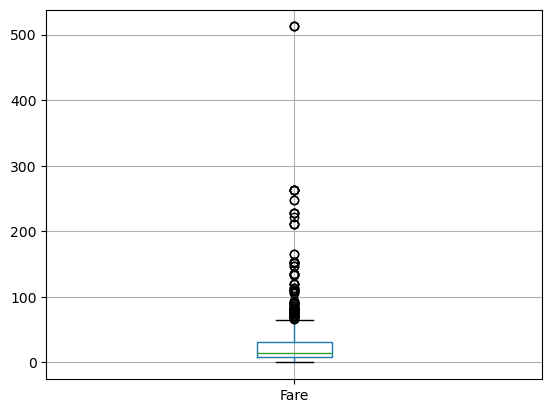

In [133]:
df[['Fare']].boxplot()

In [135]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.373737,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019974,1.102743,0.806057,49.693429
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [137]:
df.loc[df['Fare']>300,'Fare']=300

<Axes: >

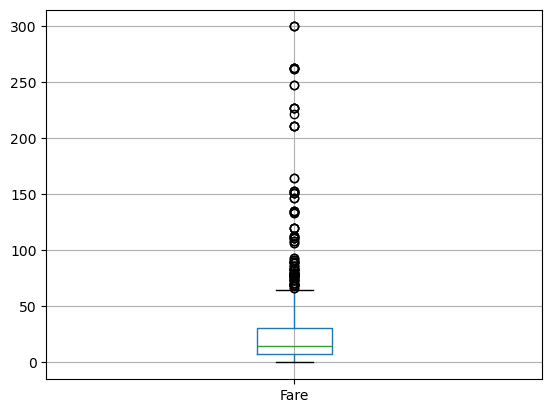

In [139]:
df[['Fare']].boxplot()

In [141]:
df[df['Fare']==0]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
179,0,3,36.0,0,0,0.0,False,True,False,False,True
263,0,1,40.0,0,0,0.0,False,True,False,False,True
271,1,3,25.0,0,0,0.0,False,True,False,False,True
277,0,2,28.0,0,0,0.0,False,True,False,False,True
302,0,3,19.0,0,0,0.0,False,True,False,False,True
413,0,2,28.0,0,0,0.0,False,True,False,False,True
466,0,2,28.0,0,0,0.0,False,True,False,False,True
481,0,2,28.0,0,0,0.0,False,True,False,False,True
597,0,3,49.0,0,0,0.0,False,True,False,False,True
633,0,1,28.0,0,0,0.0,False,True,False,False,True


In [143]:
df.groupby(['Pclass']).median()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Pclass,,,,,,,,,,
1,1.0,35.0,0.0,0.0,60.2875,0.0,1.0,0.0,0.0,1.0
2,0.0,28.0,0.0,0.0,14.2500,0.0,1.0,0.0,0.0,1.0
3,0.0,28.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0


In [145]:
df.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Pclass,,,,,,,,,,
1,0.629630,36.814815,0.416667,0.356481,81.205671,0.435185,0.564815,0.393519,0.009259,0.587963
2,0.472826,29.777174,0.402174,0.380435,20.662183,0.413043,0.586957,0.092391,0.016304,0.891304
3,0.242363,25.949084,0.615071,0.393075,13.675550,0.293279,0.706721,0.134420,0.146640,0.718941


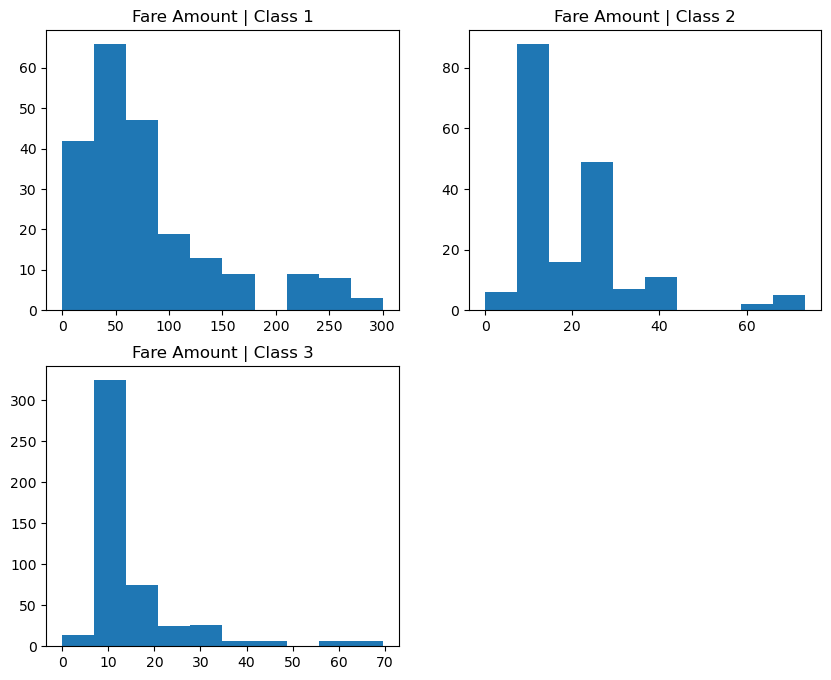

In [177]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.hist(df.loc[df['Pclass']==1,'Fare'])
plt.title('Fare Amount | Class 1')
plt.subplot(2,2,2)
plt.hist(df.loc[df['Pclass']==2,'Fare'])
plt.title('Fare Amount | Class 2')
plt.subplot(2,2,3)
plt.hist(df.loc[df['Pclass']==3,'Fare'])
plt.title('Fare Amount | Class 3')
plt.show()

## Filling zero values for each class with the mean 

In [190]:
df.loc[((df['Fare']==0)&(df['Pclass']==1)),'Fare']=df[(df['Pclass']==1)]['Fare'].mean()

In [192]:
df.loc[((df['Fare']==0)&(df['Pclass']==2)),'Fare']=df[(df['Pclass']==2)]['Fare'].mean()

In [194]:
df.loc[((df['Fare']==0)&(df['Pclass']==3)),'Fare']=df[(df['Pclass']==3)]['Fare'].mean()

<Axes: >

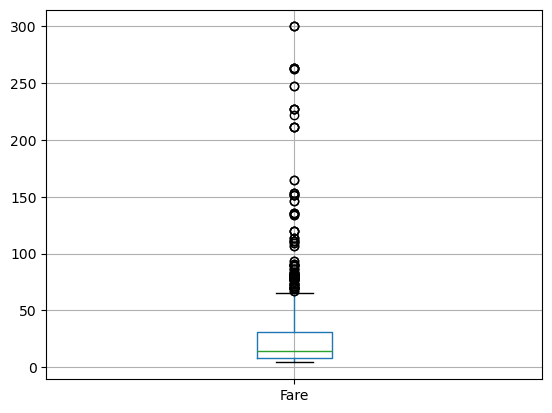

In [198]:
df[['Fare']].boxplot()

## Duplicates and Correlation 

<Axes: >

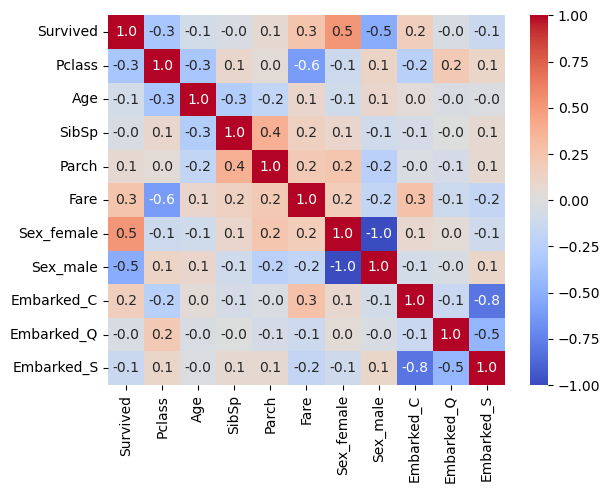

In [213]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.1f')

In [215]:
df.drop_duplicates(inplace=True)

# Models

## 1.SVM

In [204]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [206]:
feature = df.drop('Survived',axis=1)
target = df['Survived']

In [208]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=44)

### Train & Test

In [210]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [217]:
print(  classification_report(y_test,svm_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        94
           1       0.75      0.70      0.73        61

    accuracy                           0.79       155
   macro avg       0.79      0.78      0.78       155
weighted avg       0.79      0.79      0.79       155



## 2.Decision Tree

### Grid Search for HyperParameters Tuning

In [223]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [231]:
min_samples_split_list = [5,7,10]
max_depth_list=[50,60,70,80,90,100]
from sklearn.model_selection import GridSearchCV
parameters = {'min_samples_split':min_samples_split_list,'max_depth':max_depth_list}
param_search = GridSearchCV(dt_model, parameters,verbose=False)
param_search.fit(x_train, y_train)
best_param=param_search.best_params_
best_param

{'max_depth': 90, 'min_samples_split': 10}

### Train & Test

In [233]:
dt_model=DecisionTreeClassifier(min_samples_split=best_param['min_samples_split'],max_depth=best_param['max_depth'])
dt_model.fit(x_train,y_train)
print( classification_report(y_test,dt_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        94
           1       0.69      0.74      0.71        61

    accuracy                           0.77       155
   macro avg       0.76      0.76      0.76       155
weighted avg       0.77      0.77      0.77       155



## 3.XGBoost

### Grid Search for HyperParameters Tuning

In [239]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()

In [281]:
early_stopping_rounds_list = [8,10,20, 30]
learning_rate = [0.1, 0.01, 0.05,0.001]
n_estimators_list = [100,200,400]
x_train_fit,x_train_eval,y_train_fit,y_train_eval = train_test_split(x_train,y_train,test_size=0.2,random_state=44)
parameters = {'learning_rate':learning_rate, 'early_stopping_rounds':
early_stopping_rounds_list, 'n_estimators':n_estimators_list}
param_search = GridSearchCV(xgb_model, parameters)
param_search.fit(x_train, y_train,eval_set=[(x_train_eval,y_train_eval) ],verbose=False)


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.05, max_bin...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=50,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'early_stopping_rounds': [8, 10, 20, 30],
                         'learning_rate': [0.1, 0.01, 0.05, 0.001],
                         'n_estimators': [100, 200, 400]})

In [282]:
best_param=param_search.best_params_
best_param

{'early_stopping_rounds': 8, 'learning_rate': 0.05, 'n_estimators': 100}

### Train & Test

In [284]:
xgb_model = XGBClassifier (n_estimators= best_param['n_estimators'], learning_rate=best_param['learning_rate'],early_stopping_rounds= best_param['early_stopping_rounds'])
xgb_model.fit(x_train_fit,y_train_fit,eval_set=[(x_train_eval,y_train_eval) ],verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=8,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [285]:
print(classification_report(y_test,xgb_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        94
           1       0.89      0.64      0.74        61

    accuracy                           0.83       155
   macro avg       0.84      0.79      0.81       155
weighted avg       0.84      0.83      0.82       155



## K-N-N

### Normalizing the Data for a better accuracy

In [257]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


### Train & Test

In [290]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled,y_train)
report=classification_report(y_test,knn_model.predict(x_test_scaled))
print( classification_report(y_test,knn_model.predict(x_test_scaled)))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        94
           1       0.79      0.74      0.76        61

    accuracy                           0.82       155
   macro avg       0.81      0.81      0.81       155
weighted avg       0.82      0.82      0.82       155

